<a href="https://colab.research.google.com/github/AnuHaridas/foretara-prophet-tsm/blob/main/CaseStudy_Foretara_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving boots_sales_forecast_data.csv to boots_sales_forecast_data.csv


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4l1b_1qt/jyz3k24m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4l1b_1qt/u09g96dd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17240', 'data', 'file=/tmp/tmp4l1b_1qt/jyz3k24m.json', 'init=/tmp/tmp4l1b_1qt/u09g96dd.json', 'output', 'file=/tmp/tmp4l1b_1qt/prophet_model9u00_cag/prophet_model-20250419063753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:37:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:37:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


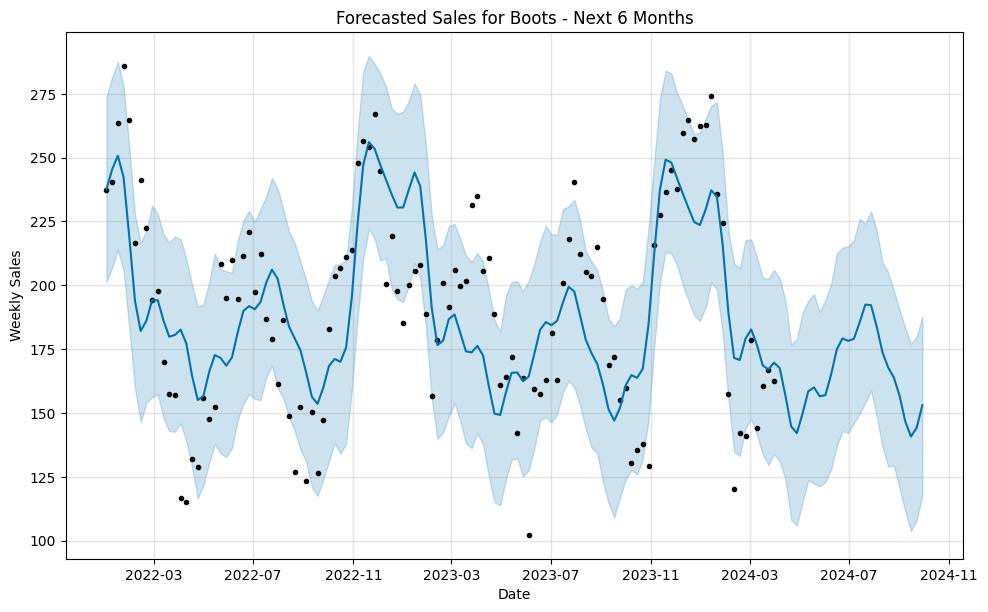

In [ ]:
# Upload your CSV
from google.colab import files
uploaded = files.upload()

# Load data
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("boots_sales_forecast_data.csv")
df = df[['ds', 'y']]

# Fit Prophet
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.fit(df)

# Forecast next 6 months
future = model.make_future_dataframe(periods=26, freq='W')
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.title("Forecasted Sales for Boots - Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()




---



In [ ]:
# Ensure both sides of the merge have datetime format
test['ds'] = pd.to_datetime(test['ds'])

# Now merge forecast with actuals
forecast_test = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds')

# Continue with metrics
mae = mean_absolute_error(forecast_test['y'], forecast_test['yhat'])
mape = mean_absolute_percentage_error(forecast_test['y'], forecast_test['yhat']) * 100
bias = (forecast_test['yhat'] - forecast_test['y']).mean()

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Bias: {bias:.2f}")


MAE: 39.69
MAPE: 21.72%
Bias: -8.94


<ipython-input-4-e3c575331c9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwnjekgw/iveklubr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwnjekgw/aoybvyxz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20028', 'data', 'file=/tmp/tmphwnjekgw/iveklubr.json', 'init=/tmp/tmphwnjekgw/aoybvyxz.json', 'output', 'file=/tmp/tmphwnjekgw/prophet_modelv1vlwcan/prophet_model-20250422105907.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:59:07 - cmdstanpy - INFO - Chain [1] start processing
I

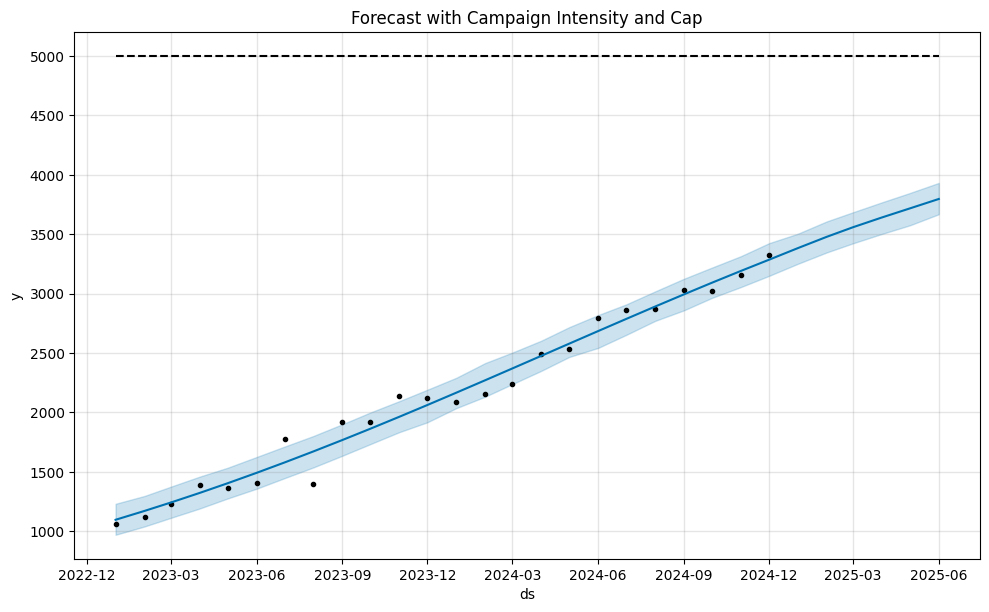

In [ ]:
# STEP 1: Install Prophet
!pip install prophet

# STEP 2: Import
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# STEP 3: Simulate data
dates = pd.date_range(start='2023-01-01', periods=24, freq='MS')
sales = 1000 + (np.arange(24) * 100) + np.random.normal(0, 100, 24)
campaign = [0]*18 + [1, 2, 2, 1, 0, 0]
cap = [5000]*24

df = pd.DataFrame({
    'ds': dates,
    'y': sales,
    'launch_campaign_intensity': campaign,
    'cap': cap
})

# STEP 4: Prophet with logistic growth + regressor
model = Prophet(growth='logistic')
model.add_regressor('launch_campaign_intensity')
model.fit(df)

# STEP 5: Create future
future = model.make_future_dataframe(periods=6, freq='MS')
future['launch_campaign_intensity'] = [0]*24 + [1, 2, 2, 1, 0, 0]
future['cap'] = [5000]*30

# STEP 6: Forecast
forecast = model.predict(future)

# STEP 7: Plot
model.plot(forecast)
plt.title("Forecast with Campaign Intensity and Cap")
plt.show()


In [ ]:
df_cv = cross_validation(model,
                         initial='450 days',
                         period='90 days',
                         horizon='90 days')


INFO:prophet:Making 2 forecasts with cutoffs between 2024-06-04 00:00:00 and 2024-09-02 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwnjekgw/ednz0g6a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwnjekgw/zykfzx95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87597', 'data', 'file=/tmp/tmphwnjekgw/ednz0g6a.json', 'init=/tmp/tmphwnjekgw/zykfzx95.json', 'output', 'file=/tmp/tmphwnjekgw/prophet_model5ianacpe/prophet_model-20250422111612.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:16:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:16:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwnjekgw/votyl3_z.json
DEBUG:cmdstanpy:input tempfi

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p[['horizon', 'mape', 'rmse', 'coverage']].round(3)


,horizon,mape,rmse,coverage
0,27 days,0.238,681.194,0.0
1,29 days,0.029,86.868,1.0
2,58 days,0.544,1559.946,0.0
3,60 days,0.014,44.673,1.0
4,89 days,0.494,1495.272,0.0
5,90 days,0.008,25.252,1.0


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


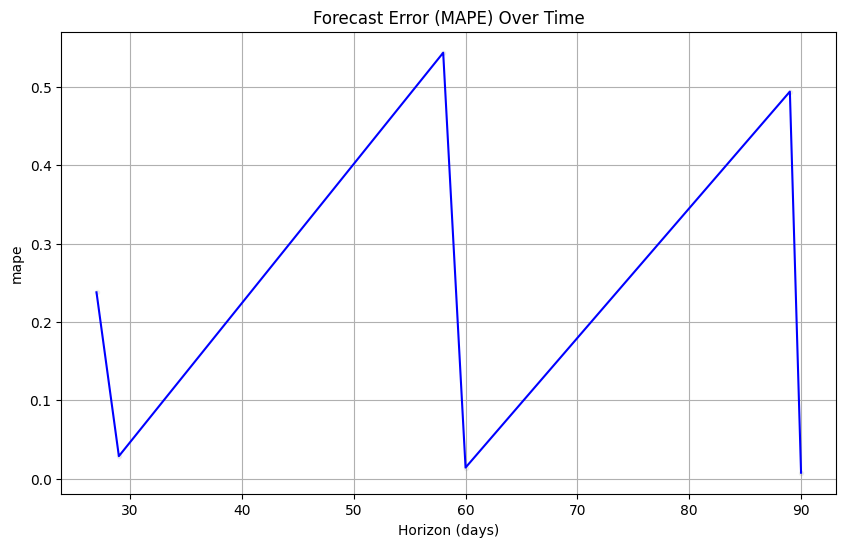

In [ ]:
from prophet.plot import plot_cross_validation_metric

# Plot MAPE over the forecast horizon
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.title("Forecast Error (MAPE) Over Time")
plt.show()


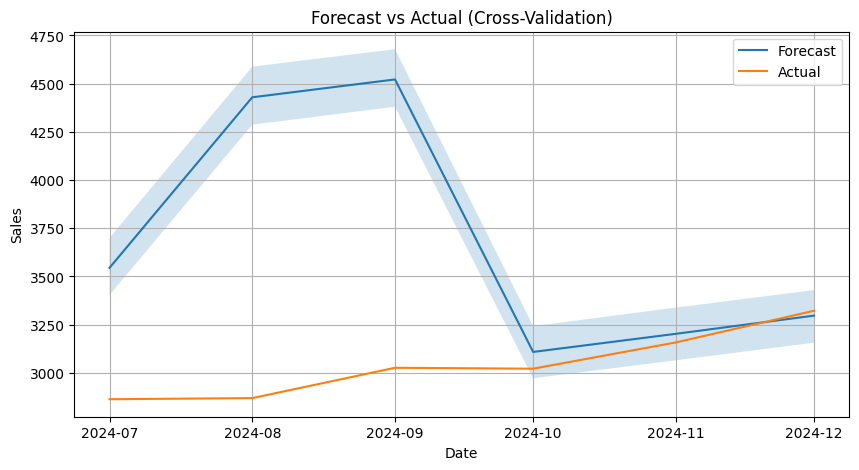

In [ ]:
import matplotlib.pyplot as plt

# Overlay actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(df_cv['ds'], df_cv['yhat'], label='Forecast')
plt.plot(df_cv['ds'], df_cv['y'], label='Actual')
plt.fill_between(df_cv['ds'], df_cv['yhat_lower'], df_cv['yhat_upper'], alpha=0.2)
plt.legend()
plt.title("Forecast vs Actual (Cross-Validation)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()
